In [1]:
# Import pandas library
import pandas as pd
import numpy as np
from scipy.stats import entropy
# Read csv data file
# Data without feature standardization
df = pd.read_csv('Labelled50GapRandom.csv')
# View the number of rows and columns
df.head()
df.dtypes
df.shape

(2169, 153)

In [2]:
# Indicate the target column
target = df['Label_mL']
# Indicate the columns that will serve as features
features = df.drop('Label_mL', axis = 1)

In [3]:
'''
features = df[[  'Signal012',
                'Signal013',
                'Signal112',
                'Signal711',
                'Signal712',
                'Signal713',
                'Signal714' ]] 
                '''

"\nfeatures = df[[  'Signal012',\n                'Signal013',\n                'Signal112',\n                'Signal711',\n                'Signal712',\n                'Signal713',\n                'Signal714' ]] \n                "

In [4]:
# Split data into train, validation and test sets
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split the dataset into training + development set and test set
x, x_test, y, y_test = train_test_split(features, target, test_size = 0.4, random_state = 0)
# Split the dataset into training set and development set
#x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [5]:
# Training a decision tree model
# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier with default parameters


In [6]:
print(y_test.shape)

(868,)


In [7]:
# Evaluate the decision tree model on development set
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Compute the model accuracy on the development set: How often is the classifier correct?
#print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))

pre = []
acc = []
true = []

# Predict the target for the development dataset
for i in range(10):
    dtree = DecisionTreeClassifier()
    # Train the model using the training set
    dtree.fit(x, y)
    dev_predict = dtree.predict(x_test)
    
    ACC = metrics.accuracy_score(y_test, dev_predict)
    print(ACC)
    
    #print(dev_predict)
    
    
    pre.append(dev_predict)
    true.append(y_test)
    acc.append(ACC)
#dev_predict

m=np.mean(acc)
std=np.std(acc)
print(" ")
print(m)
print(std)

0.9792626728110599
0.9850230414746544
0.9850230414746544
0.9850230414746544
0.9815668202764977
0.9815668202764977
0.9850230414746544
0.9838709677419355
0.9815668202764977
0.9850230414746544
 
0.9832949308755762
0.0020120102761028713


In [8]:
'''
# Evaluate the decision tree model on development set
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))
'''

'\n# Evaluate the decision tree model on development set\n# Import scikit-learn metrics module for accuracy calculation\nfrom sklearn import metrics\n# Compute the model accuracy on the development set: How often is the classifier correct?\nprint("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))\n'

In [9]:
pre=np.array(pre).reshape(8680)
true=np.array(true).reshape(8680)

In [10]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print(confusion_matrix(pre, true))
# Print precision, recall and F1
print(classification_report(pre, true))

[[910   0   6   0   0   0   0   0   0   0   0]
 [  0 870  31   0   0   5   0   0   0   0   0]
 [  0   0 710   0   0   0   0   0   0   0   0]
 [  0   0   0 810   0  20   0   0   0   0   0]
 [  0   0   0   0 759   0   0   0   0   0   0]
 [  0   0   3   0   1 575   3   0   0   0   0]
 [  0   0   0   0   0   0 747   0   0   1   0]
 [  0   0   0   0   0   0   0 760   0  10   0]
 [  0   0   0   0   0   0   0   0 868   2   4]
 [  0   0   0   0   0   0   0   8   6 760   0]
 [  0   0   0   0   0   0   0   2  16  27 766]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       916
          50       1.00      0.96      0.98       906
         100       0.95      1.00      0.97       710
         150       1.00      0.98      0.99       830
         200       1.00      1.00      1.00       759
         250       0.96      0.99      0.97       582
         300       1.00      1.00      1.00       748
         350       0.99      0.99      0.99      

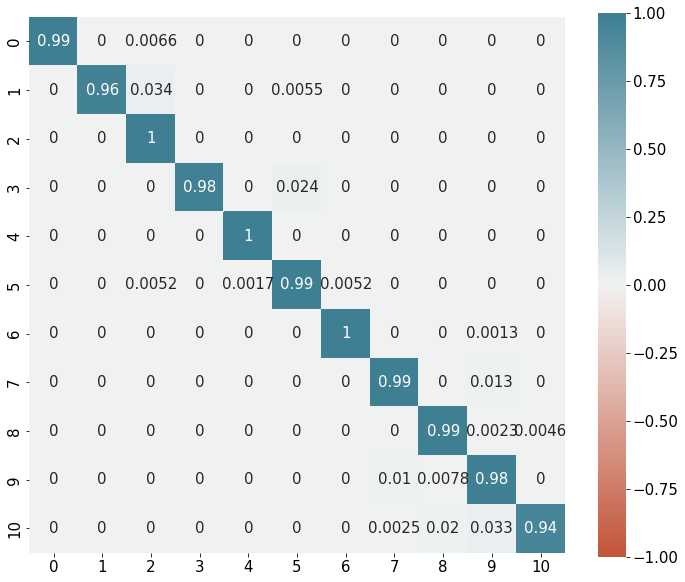

In [11]:
# Generating the correlation heatmap is optional
# The heatmap is just a visualization of the correlation matrix
# Import seaborn package to generate heatmap
import seaborn as sns
# Import pyplot to control the size of the plot
import matplotlib.pyplot as plt
# Set plot size
plt.rcParams.update({'font.size': 15, 'figure.figsize': (10, 8)})
plt.figure(figsize=(12,10))
# Generate the heatmap
ax = sns.heatmap(confusion_matrix(pre, true,normalize='true'),
 vmin = -1, vmax = 1, center = 0,
 cmap = sns.diverging_palette(20, 220, n=200),
 square = True,
 annot = True,
 #fmt="d"
                )

In [12]:
# Create a decision tree classifier with criterion = entropy and max_depth = 3
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20)
# Train the model using the training set
dtree.fit(x, y)
# Predict the target for the development dataset
dev_predict = dtree.predict(x_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))

Accuracy:  0.9896313364055299


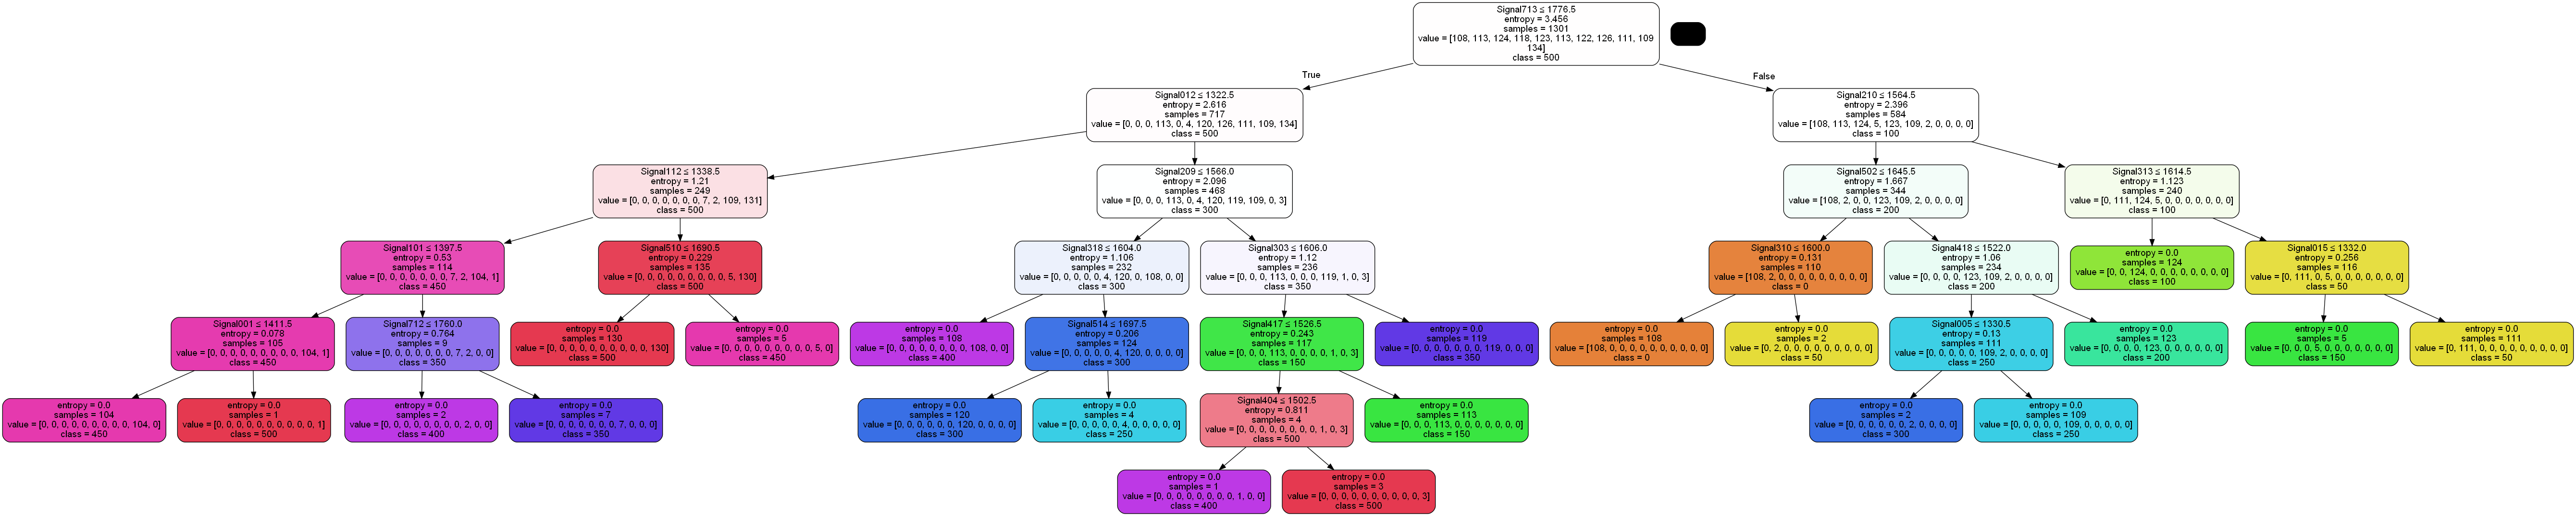

In [13]:
# Load required libraries
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image
# Visualize decision tree
dot_data = StringIO()
tree.export_graphviz(dtree,
 out_file = dot_data,
 class_names = ['0', '50','100', '150','200', '250','300', '350', '400','450', '500'], # name of each of the target classes in asce
 feature_names = features.columns, # the feature names.
 filled = True, # whether to fill in the boxes with colors.
 rounded = True, # whether to round the corners of the boxes.
 special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [14]:
# Load export_text library
from sklearn.tree import export_text
tree_rules = export_text(dtree, feature_names=list(x))
# Print deccision tree rules
print(tree_rules)

|--- Signal713 <= 1776.50
|   |--- Signal012 <= 1322.50
|   |   |--- Signal112 <= 1338.50
|   |   |   |--- Signal101 <= 1397.50
|   |   |   |   |--- Signal001 <= 1411.50
|   |   |   |   |   |--- class: 450
|   |   |   |   |--- Signal001 >  1411.50
|   |   |   |   |   |--- class: 500
|   |   |   |--- Signal101 >  1397.50
|   |   |   |   |--- Signal712 <= 1760.00
|   |   |   |   |   |--- class: 400
|   |   |   |   |--- Signal712 >  1760.00
|   |   |   |   |   |--- class: 350
|   |   |--- Signal112 >  1338.50
|   |   |   |--- Signal510 <= 1690.50
|   |   |   |   |--- class: 500
|   |   |   |--- Signal510 >  1690.50
|   |   |   |   |--- class: 450
|   |--- Signal012 >  1322.50
|   |   |--- Signal209 <= 1566.00
|   |   |   |--- Signal318 <= 1604.00
|   |   |   |   |--- class: 400
|   |   |   |--- Signal318 >  1604.00
|   |   |   |   |--- Signal514 <= 1697.50
|   |   |   |   |   |--- class: 300
|   |   |   |   |--- Signal514 >  1697.50
|   |   |   |   |   |--- class: 250
|   |   |--- Signal2